# Lorentz 1963
$$ \dot x = \sigma ( y - x) $$
$$ \dot y = x ( \rho  - z) - y $$
$$ \dot z = x y - \beta z $$

para la forma de mariposa se utilizan las constantes como:
$$ \{\sigma, \beta, \rho\} = \{10, 8/3, 28\} $$

como observaras las variables estan entre mezcladas por tanto nuestra implementacion de euler no podra ser, pues hemos de actualizar cada variable entremedio y comunicar los datos, por ello solo utilizaremos un 1 step

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from euler_integrator import euler1step

sigma, beta, rho = 10, 8/3, 28

In [4]:
def lorentz(t, r):
    dr = [  sigma * ( r[1] - r[0]),
            r[0] * (rho - r[2]) - r[1],
            r[0] * r[1] - beta * r[2]   ]
    return np.array(dr)

In [9]:
# condiciones iniciales
r0 = [-7, 7, 28]

# trayectoria de tiempo
dt = 0.01
T  = 8
t = np.arange(0, T, dt)
N_t = len(t)

# donde se guarda la solucion
R = np.zeros((3, N_t)) # vectores columnas de datos

R[:,0] = r0             # agregamos el primer dato
r_t = r0
for i in range(1, N_t):  # por tanto restamos 1 de aqui
    r_tp1 = euler1step(lorentz, dt, t[i], r_t)
    R[:, i] = r_tp1
    r_t = r_tp1

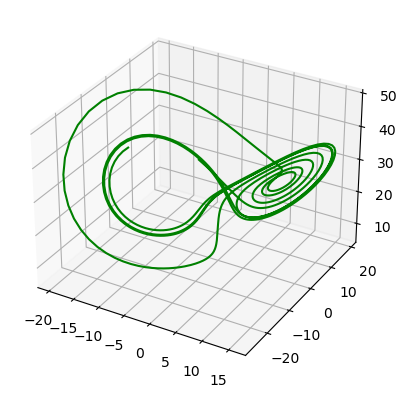

In [10]:
# proyectamos la figura
ax = plt.figure().add_subplot(projection = '3d')
ax.plot(R[0,:], R[1,:], R[2,:], 'g')
plt.show()

